In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('car-price_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df = df[['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style',
         'highway MPG', 'city mpg', 'MSRP']]
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.fillna(0)

In [5]:
average = df.msrp.mean()
df['above_average'] =  df.msrp.apply(lambda x: 1 if x>average else 0) 
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [6]:
del df['msrp']
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
full_train, test = train_test_split(df, test_size=0.2, random_state=1)
train, val = train_test_split(full_train, test_size=0.25, random_state=1)


In [9]:
print(train.shape, test.shape, val.shape)

(7148, 10) (2383, 10) (2383, 10)


### Question 1

In [10]:
from sklearn.metrics import roc_auc_score

In [11]:
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
for fich in numerical:
    score =  roc_auc_score(train['above_average'], train[fich])
    if score<0.5:
        print(fich, roc_auc_score(train['above_average'], -train[fich]))
    else:
        print(fich, score)


year 0.687551492804683
engine_hp 0.9171031265539011
engine_cylinders 0.766116490165669
highway_mpg 0.6330587871772013
city_mpg 0.6734244643245233


### Question 2

In [12]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']

In [72]:
y_train = train['above_average']
X_train = train.drop('above_average', axis = 1)

y_test = test['above_average']
X_test = test.drop('above_average', axis = 1)

y_val = val['above_average']
X_val = val.drop('above_average', axis = 1)

In [13]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)


In [14]:
y_train = train['above_average']
y_val = val['above_average']
y_test=test['above_average']

In [15]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)
pred = model.predict(X_val)
print(round(roc_auc_score(y_val, pred), 3))

0.913


### Question 3, Question 4

In [26]:
y_pred = model.predict_proba(X_val)[:, 1]
actual_positive = (y_val==1)
actual_negative = (y_val ==0)

C:\Users\Maria\AppData\Local\Temp\ipykernel_17164\765472526.py:17: RuntimeWarning: invalid value encountered in scalar divide
  precision = true_positive /(true_positive + false_positve)


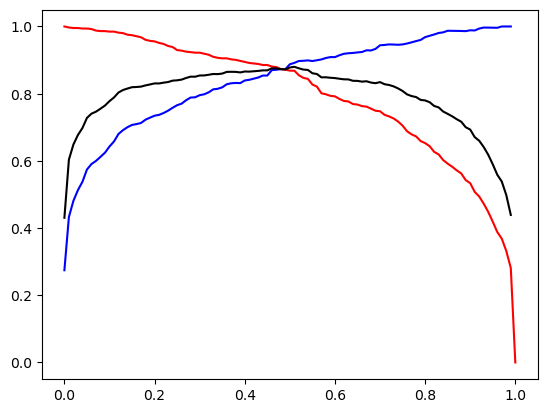

In [38]:
thresholds = np.linspace(0,  1, 101)

precisions = []
recalls = []
f1_score = []
thr = 0
for t in thresholds:
    f1_max = 0
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred <t)
    
    true_positive = (predict_positive & actual_positive).sum()
    true_negative = (predict_negative & actual_negative).sum()
    false_positve = (predict_positive & actual_negative).sum()
    false_negative =(predict_negative & actual_positive).sum()
    
    precision = true_positive /(true_positive + false_positve)
    recall = true_positive / (true_positive + false_negative)
    f1 = 2* (precision * recall)/(precision +recall)
    if f1> f1_max:
        f1_max = f1
        thr = t
    f1_score.append(f1)
    precisions.append(precision)
    recalls.append(recall)

plt.plot(thresholds, precisions, color = 'blue')
plt.plot(thresholds, recalls, color ='red')
plt.plot(thresholds, f1_score, color='black')

### Question 5

In [40]:
from sklearn.model_selection import KFold


In [61]:
train_full_dict = full_train[categorical + numerical].to_dict(orient='records')
X_train_full = dv.fit_transform(train_full_dict)
y_train_full = full_train['above_average']

In [62]:
X_train_full.shape

(9531, 974)

In [63]:
y_train_full.shape

(9531,)

In [69]:
y_train_full.reset_index(drop=True, inplace=True)

In [70]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
scores = []
for train_index, test_index in kf.split(X_train_full):
    X_tr, X_te = X_train_full[train_index, :], X_train_full[test_index, :]
    y_tr, y_te = y_train_full[train_index], y_train_full[test_index]
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    scores.append(roc_auc_score(y_te, y_pred))


In [75]:
scr = np.array(scores)
scr.std()

0.0059394207026077115

### Question 6

In [81]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
score = []
std_mean = []
for C in ([0.01, 0.1, 0.5, 10]):
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    for train_index, test_index in kf.split(X_train_full):
        scores = np.array([])
        X_tr, X_te = X_train_full[train_index, :], X_train_full[test_index, :]
        y_tr, y_te = y_train_full[train_index], y_train_full[test_index]
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_te)
        scores = np.append(scores, roc_auc_score(y_te, y_pred))
    score.append(scores.mean())
    std_mean.append(scores.std())
    
    

In [82]:
score

[0.8432567432567433, 0.889171939171939, 0.9207833832833833, 0.9323232323232322]